## 创建注释的热图
通常希望用彩色编码图像图来显示依赖于两个自变量的数据。这通常被称为热图。如果数据是分类的，这将被称为分类热图。
Matplotlib的imshow函数使得制作这样的情节特别容易。
下面的例子展示了如何创建带有注释的热图。我们将从一个简单的示例开始，并将其扩展为可用的通用函数。
一个简单的分类热图
我们可以从定义一些数据开始。我们需要的是一个2D列表或数组，它将数据定义为颜色代码。然后，我们还需要两个类别列表或数组;当然，这些列表中的元素数量需要沿着各自的轴与数据匹配。热图本身是一个imshow图，标签设置为我们所拥有的类别。请注意，必须同时设置刻度位置(set_xticks)和刻度标签(set_xticklabels)，否则它们将不同步。位置只是升序整数，而标签是要显示的标签。最后，我们可以通过在每个单元格中创建显示该单元格值的文本来标记数据本身。

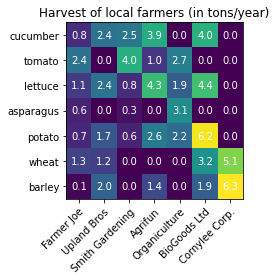

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus", 
             "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros", "Smith Gardening",
          "Agrifun", "Organiculture", "BioGoods Ltd", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")
                       
ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig("imsge50.png")
plt.show()

## 使用helper函数代码风格
正如在编码风格中讨论的那样，人们可能希望重用这样的代码，为不同的输入数据和/或在不同的轴上创建某种热图。我们创建一个函数，将数据和行、列标签作为输入，并允许用于定制绘图的参数
在这里，除了上面，我们还想创建一个颜色条，并将标签放置在热图的上方，而不是下方。标注应根据阈值得到不同的颜色，以提高与像素颜色的对比度。最后，我们关闭周围的轴刺，并创建一个白色的网格线来分离细胞。

In [17]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ox
        A 'matplotlib.axes.Axes' instance to which the heatmap is plotted. If
        not provided, use current axes or create a new one. Optional.
    cbar_kw
        A dictionary with arguments to 'matplotlib.Figure.colorbar'. Optional.
    cbarlabel
        The label for the colorbar. Optional.
    **kwargs
        All other arguments are forwarded to 'imshow'.
    """
    
    if not ax:
        ax = plt.gca()
        
    # Plot the heatmap 画出的热图
    im = ax.imshow(data, **kwargs)
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # We want to show all tick...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list enteies. 各自的列表条目
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top. 让水平轴标记出现在顶部。
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    # Rotate the tick labels and set their alignment. 旋转刻度标签并设置它们的对齐方式
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create while grid. 闭脊柱并创建while网格。
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                    textcolors=("black", "while"),
                    threshold=None, **textkw):
    """
    A function to annotate a heatmap.
    
    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate. If None, the image's data is used. Optional.
    valfmt
        The format of the annotations inside the heatmap. This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        'matplotlib.ticker.Formatter'. Optional.
    textcolors
        A pair of colors. The first is used for values below a threshold,
        the second for those above. Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied. If None (the default) uses the middle of the colormap as
        separation. Optional.
        **kwargs
            All other arguments are forwarded to each call to 'text' used to create
            the text labels.
    """
    
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
            
    # Normalize the threshold to the images color range. 将阈值归一化到图像的颜色范围。
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
            
    # Set default alignment to center, but allow it to be 
    # overwritten by textkw. 设置默认对齐方式为居中，但允许居中#重写为textkw。
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
        
    # Get the formatter in case a string is supplied 如果提供了字符串，则获取格式化程序
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
        
    # Loop over the data and create a 'Text' for each "pixel". 
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
                
    return texts

ValueError: Format specifier missing precision

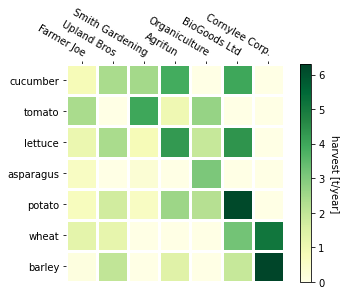

In [18]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.If} t")

fig.tight_layout()
plt.savefig("image51.png")
plt.show()

ValueError: Format specifier missing precision

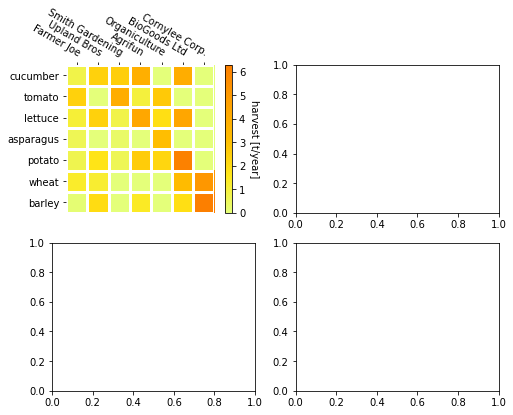

In [27]:
np.random.seed(19680801)

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Replicate the above example with a different font size and colormap.

im, _ = heatmap(harvest, vegetables, farmers, ax=ax,
                cmap="Wistia", cbarlabel="harvest [t/year]")
annotate_heatmap(im, valfmt="{x:.if}", size=7)
# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

data = np.random.randint(2, 100, size=(7, 7))
y = ["Book {}".format(i) for i in range(1, 8)]
x = ["Store {}".format(i) for i in list("ABCDEFG")]
im, _ = heatmap(data, y, x, ax=ax2, vmin=0,
                cmap="magma_r", cbarlabel="weekly sold copies")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20,
                 textcolors=("red", "white"))

#有时甚至数据本身都是明确的。这里我们用a
#“matplotlib.colors。将数据放入类中
#，并使用这个来着色的情节，也获得了类
#类数组中的标签。

data = np.random.randn(6, 6)
y = ["Prod. {}".format(i) for i in range(10, 70, 10)]
x = ["Cycle {}".format(i) for i in range(1, 7)]

qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

im, _ = heatmap(data, y, x, ax=ax3,
                cmap=plt.get_cmap("PiYG", 7), norm=norm,
                cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
                cbarlabel="Quality Rating")

annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1,
                 textcolors=("red", "black"))

#我们可以很好地绘制一个相关矩阵。因为它的边界是-1和1，
#我们使用这些作为vmin和vmax。我们也可以删除前导零并隐藏
#对角元素(都是1)使用a
#“matplotlib.ticker.FuncFormatter”。

corr_matrix = np.corrcoef(harvest)
im, _ = heatmap(corr_matrix, vegetables, vegetables, ax=ax4,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")

def func(x, pos):
    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")
annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)

plt.tight_layout()
plt.savefig("image52.png")
plt.show()